## Simple Linear Regression

In [2]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

##### Define basic statistical functions

1. Mean
2. Variance
3. CoVariance
4. coefficient

In [3]:
# calculate mean
def mean(values):
    return sum(values)/float(len(values))

In [4]:
# Calculate the variance of a list of numbers
def variance(values,mean):
    x = []
    for i in range(len(values)):        
        x.append((values[i] - mean)**2)
    return sum(x)

In [5]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

##### Calculate coefficients using custom coefficient function

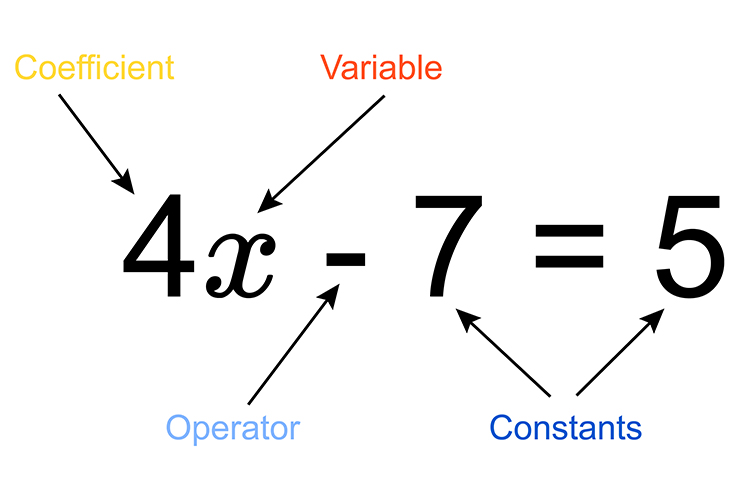

In [6]:
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

#### Root Mean Squared Error

In [7]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

## Evaluate Algorithum

In [71]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	print("Test x :- ",test_set)
	predicted = algorithm(dataset, test_set)
	print("Predicted :- ", predicted)
	actual = [row[-1] for row in dataset]
	print("Actual y :- ",actual)
	rmse = rmse_metric(actual, predicted)
	return rmse

In [81]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm_split(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	print("Training :- ", train)
	print("Test :- ", test)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	return rmse

## Simple Linear Regression Implementation

In [49]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

## Calculate y^

y^ = mx + b

In [47]:
def linear_regression(inter, b1, predicted):
    yhat = inter + b1 * predicted
    return yhat

## Dataset

In [74]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
'''
 X ,Y
[1, 1],
[2, 3],
[4, 3],
[3, 2],
[5, 5]
'''

'\n X ,Y\n[1, 1],\n[2, 3],\n[4, 3],\n[3, 2],\n[5, 5]\n'

## Call & Root Mean Square Error Value

In [72]:
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

Test x :-  [[1, None], [2, None], [4, None], [3, None], [5, None]]
Predicted :-  [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
Actual y :-  [1, 3, 3, 2, 5]
RMSE: 0.693


## Get Coefficient Value

In [64]:
b0, b1 = coefficients(dataset)
pre_value = linear_regression(b0, b1, 5)
print(pre_value)

4.3999999999999995


## Read External CSV File

In [31]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Split a dataset into a train and test set
def train_test_split(dataset, split):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

## Load CSV file

In [102]:
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
split = 0.5

In [96]:
rmse = evaluate_algorithm_split(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

Training :-  [[45.0, 214.0], [12.0, 58.1], [30.0, 194.5], [15.0, 32.1], [17.0, 142.1], [40.0, 119.4], [3.0, 4.4], [10.0, 65.3], [11.0, 57.2], [24.0, 137.9], [6.0, 14.6], [61.0, 217.6], [3.0, 39.9], [7.0, 27.9], [24.0, 134.9], [14.0, 77.5], [41.0, 181.3], [19.0, 46.2], [5.0, 40.3], [13.0, 89.9], [9.0, 87.4], [108.0, 392.5], [55.0, 162.8], [7.0, 77.5], [9.0, 52.1], [26.0, 187.5], [11.0, 23.5], [22.0, 161.5], [124.0, 422.2], [57.0, 170.9], [23.0, 56.9], [13.0, 15.7], [53.0, 244.6], [31.0, 209.8], [20.0, 98.1], [27.0, 92.6], [23.0, 113.0], [25.0, 69.2], [29.0, 133.3], [5.0, 20.9], [41.0, 73.4], [3.0, 13.2], [37.0, 152.8], [8.0, 76.1], [8.0, 55.6], [29.0, 103.9], [16.0, 59.6], [4.0, 11.8], [60.0, 202.4], [2.0, 6.6], [14.0, 95.5], [0.0, 0.0], [6.0, 14.8], [48.0, 248.1], [11.0, 21.3], [7.0, 48.8], [6.0, 50.9]]
Test :-  [[23.0, 39.6], [9.0, 48.7], [4.0, 38.1], [4.0, 12.6], [13.0, 93.0], [13.0, 31.9]]
RMSE: 31.817


## Get Coefficient Value

In [113]:
train, test = train_test_split(dataset, 0.3)

b0, b1 = coefficients(dataset)
pre_value = linear_regression(b0, b1, 6)
print(pre_value) #173.42249431572077

40.47742711951301
